# Electron Tag and Probe using the J/psi meson

- Repository: https://github.com/ku-cms/LeptonStudies
- CERN SWAN platform: https://swan.cern.ch/
- CERN SWAN info: https://swan.web.cern.ch/swan/
- NANO AOD documentation page: https://cms-nanoaod-integration.web.cern.ch/autoDoc/
- CMS Data Aggregation System (DAS): https://cmsweb.cern.ch/das/

In [1]:
# import libraries
import uproot
from glob import glob
import awkward as ak
import numpy as np
from coffea.nanoevents import NanoEventsFactory

# plotting libraries
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import mplhep

# set up mplhep
mplhep.style.use(mplhep.style.CMS)

In [2]:
# run this again to make sure the figure size updates (a known bug)
mplhep.style.use(mplhep.style.CMS)

In [3]:
# Load dataset files

base_directory = "/eos/user/c/caleb/CMS/datasets"

data_files = sorted(glob(f"{base_directory}/2023_Data/Muon0_Run2023C-22Sep2023_v1-v1_NANOAOD/*.root"))

n_data_files = len(data_files)
example_data_file = data_files[0]
open_data_file = uproot.open(example_data_file)

print("Number of data files: {0}".format(n_data_files))
print("Example data file path:")
print(example_data_file)
print("Example data file info:")
dict(open_data_file)

Number of data files: 90
Example data file path:
/eos/user/c/caleb/CMS/datasets/2023_Data/Muon0_Run2023C-22Sep2023_v1-v1_NANOAOD/01e84393-6b2e-4d57-87a4-f71475c051a2.root
Example data file info:


{'tag;1': <TObjString 'untagged' at 0x7f06565a9c80>,
 'Events;1': <TTree 'Events' (1623 branches) at 0x7f07080f37f0>,
 'LuminosityBlocks;1': <TTree 'LuminosityBlocks' (5 branches) at 0x7f07080f3430>,
 'Runs;1': <TTree 'Runs' (1 branches) at 0x7f07080f37c0>,
 'MetaData;1': <TTree 'MetaData' (1 branches) at 0x7f0656541700>,
 'ParameterSets;1': <TTree 'ParameterSets' (1 branches) at 0x7f07080f3880>}

In [5]:
# Create NanoEventsFactory objects
data_events = NanoEventsFactory.from_root(example_data_file).events()

In [6]:
# Print:
# - number of events
# - number of electrons
# - number of muons

# variables
n_events    = 0
n_electrons = 0
n_muons     = 0

# Data
n_events    = len(data_events.run)
n_electrons = len(ak.flatten(data_events.Electron))
n_muons     = len(ak.flatten(data_events.Muon))

# per event (on average)
n_electrons_per_event = n_electrons / n_events
n_muons_per_event     = n_muons / n_events

print("Sample: Muon Data 2023")
print(" - Number of events: {0}".format(n_events))
print(" - Number of electrons: total = {0}, per event (avg.) = {1:.2f}".format(n_electrons, n_electrons_per_event))
print(" - Number of muons: total = {0}, per event (avg.) = {1:.2f}".format(n_muons, n_muons_per_event))


Sample: Muon Data 2023
 - Number of events: 1032791
 - Number of electrons: total = 254635, per event (avg.) = 0.25
 - Number of muons: total = 1822803, per event (avg.) = 1.76


(array([     0.,      0.,      0., 222756., 136696.,  92811.,  65179.,
         49873.,  51868.,  42728.,  38028.,  31241.,  28352.,  24704.,
         20838.,  32632.,  30124.,  30544.,  27893.,  24478.,  22550.,
         19965.,  18048.,  17304.,  41527.,  39003.,  35677.,  33421.,
         31514.,  30378.,  29549.,  28040.,  27471.,  27391.,  27103.,
         26709.,  26374.,  26516.,  25789.,  24158.,  21926.,  19634.,
         17230.,  15292.,  13486.,  11941.,  10494.,   9387.,   8330.,
          7878.,  10191.,   9380.,   8355.,   7843.,   6967.,   6501.,
          5942.,   5419.,   4987.,   4623.,   4316.,   4004.,   3667.,
          3360.,   3373.,   3060.,   2793.,   2698.,   2548.,   2350.,
          2221.,   2080.,   2041.,   1859.,   1750.,   1664.,   1603.,
          1507.,   1444.,   1388.,   1287.,   1275.,   1195.,   1130.,
          1067.,   1008.,   1021.,    929.,    894.,    872.,    826.,
           851.,    792.,    735.,    722.,    725.,    669.,    672.,
      

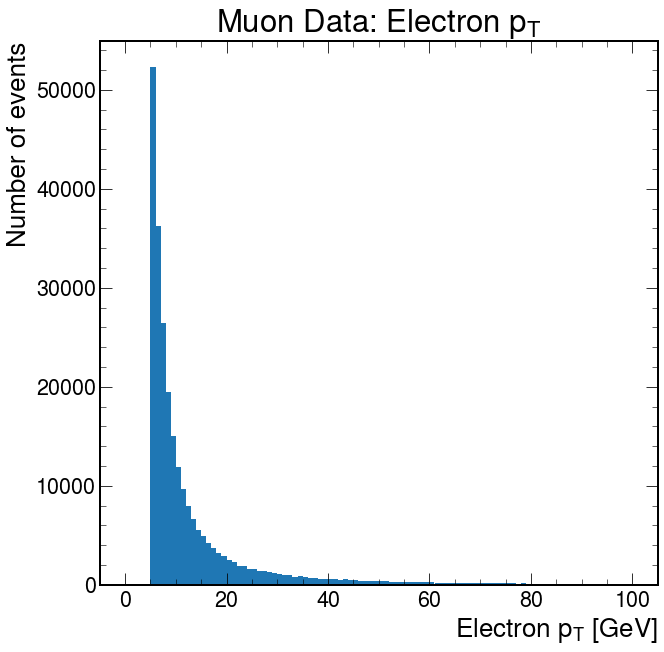

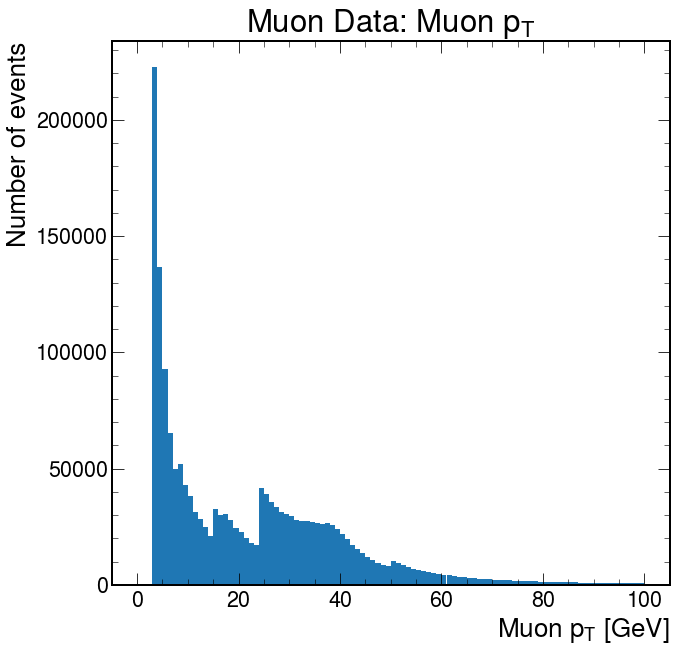

In [9]:
# Muon Data

# Electron pT
fig, ax = plt.subplots()
ax.set_title(r"Muon Data: Electron $p_{T}$")
ax.set_xlabel(r"Electron $p_{T}$ [GeV]")
ax.set_ylabel(r"Number of events")
ax.hist(ak.flatten(data_events.Electron.pt), bins=np.linspace(0, 100, 101))

# Muon pT
fig, ax = plt.subplots()
ax.set_title(r"Muon Data: Muon $p_{T}$")
ax.set_xlabel(r"Muon $p_{T}$ [GeV]")
ax.set_ylabel(r"Number of events")
ax.hist(ak.flatten(data_events.Muon.pt), bins=np.linspace(0, 100, 101))
